In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# to display all columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [140]:
# load train data
data = pd.read_csv('../datasets/train.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [141]:
# drop id
data.drop('Id', axis=1, inplace=True)
print(data.shape)

(1460, 80)


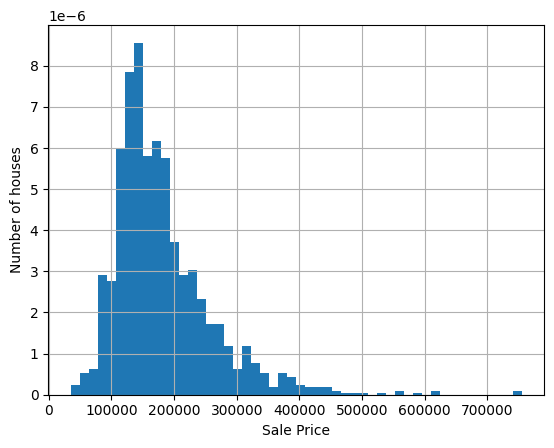

In [142]:
# target
data['SalePrice'].hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

Target is continuous and has a skewed distribution

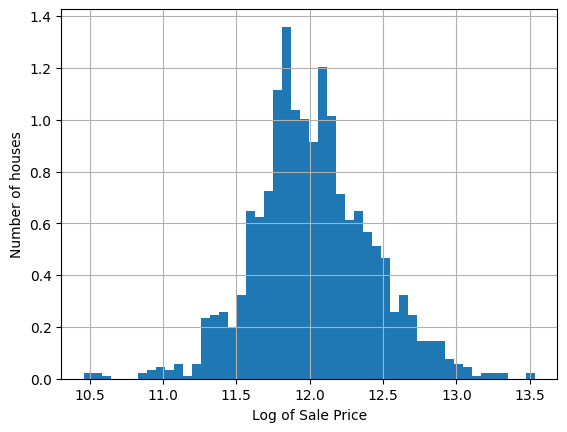

In [143]:
# log of target
np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Log of Sale Price')
plt.show()

Log of Target results in a more Gaussian-like distribution.

In [144]:
# categorical variables
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
# MSSubClass is categorical by definition, despite its numeric values
cat_vars.append('MSSubClass')
print(len(cat_vars))

44


In [145]:
# cast all variabels as categorical
data[cat_vars] = data[cat_vars].astype('O')

In [146]:
# categorical variables
num_vars = [var for var in data.columns if var not in cat_vars and var!= 'SalePrice']
print(len(num_vars))

35


In [147]:
# vars with missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>0]

# percentage of missing values
data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

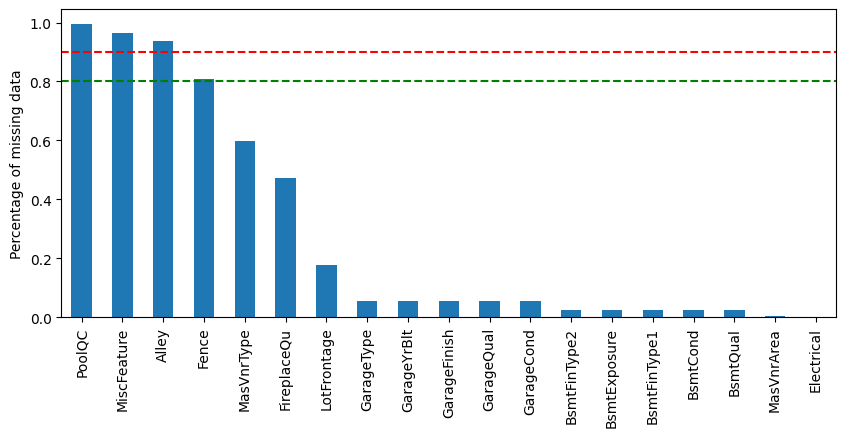

In [148]:
# plot of missing values
data[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(
    figsize=(10,4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.axhline(y=0.8, color='g', linestyle='--')
plt.show()

In [149]:
cat_na = [var for var in cat_vars if var in vars_with_na]
print('Number of categorical variables with na: ', len(cat_na))
num_na = [var for var in num_vars if var in vars_with_na]
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  16
Number of numerical variables with na:  3


In [150]:
def analyse_na_value(df, var):
    df = df.copy()
    df[var] = np.where(df[var].isnull(), 1, 0)
    tmp = df.groupby(var).SalePrice.agg(['mean', 'std'])
    tmp.plot(kind='barh', y='mean', legend=False, xerr='std',
             title='Sale Price', color='green')
    plt.show()

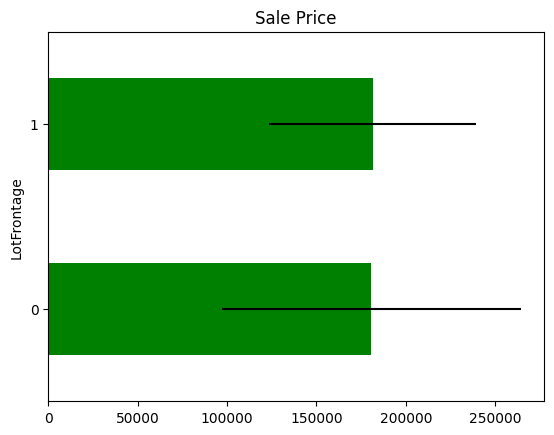

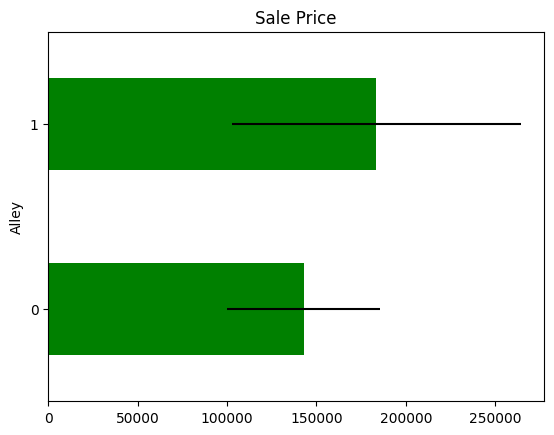

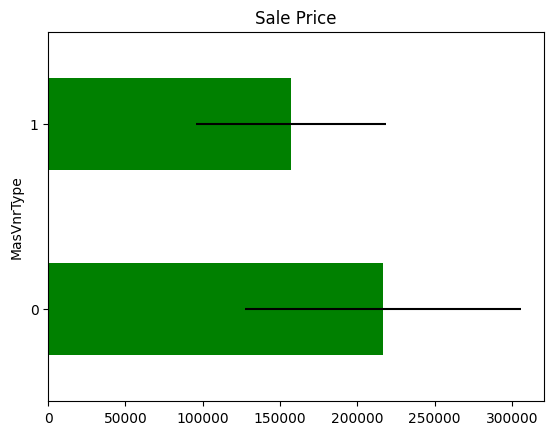

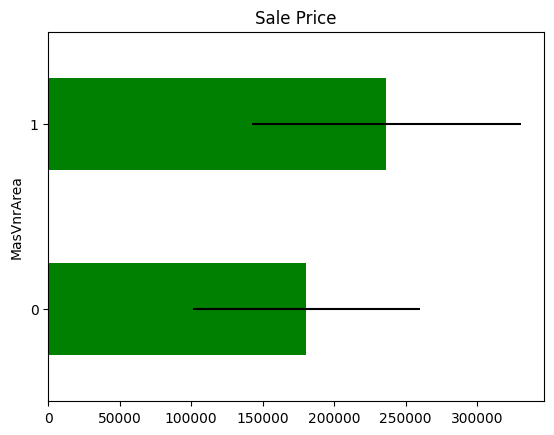

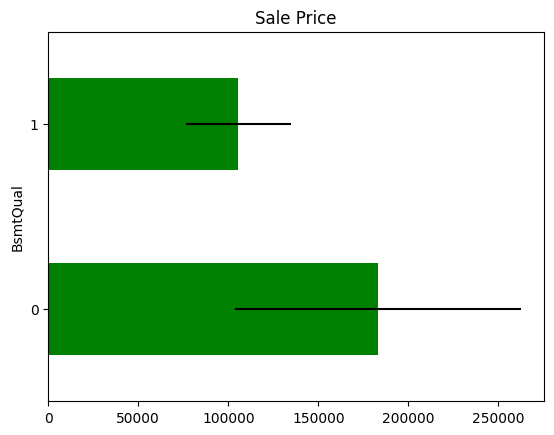

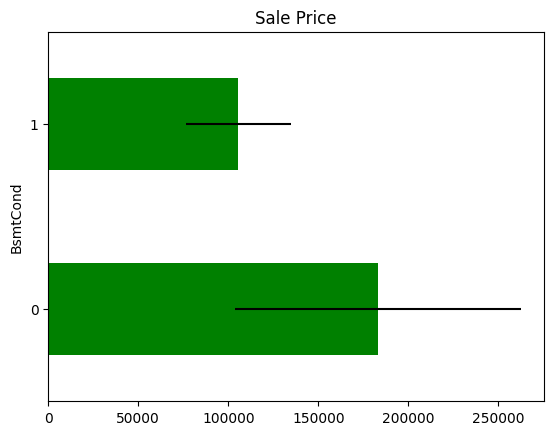

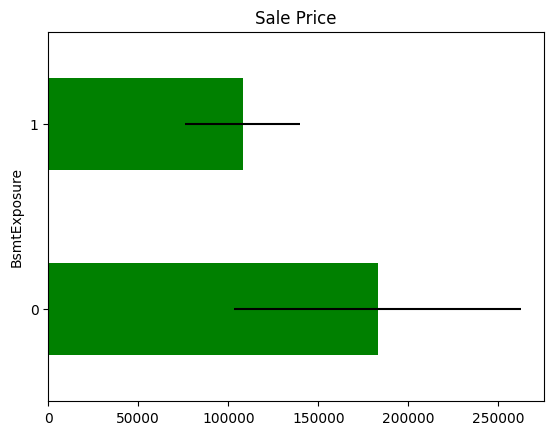

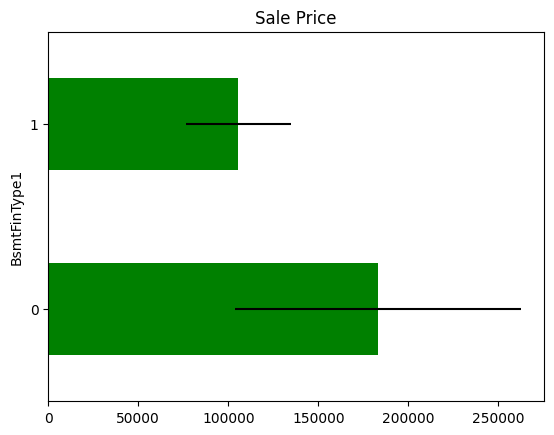

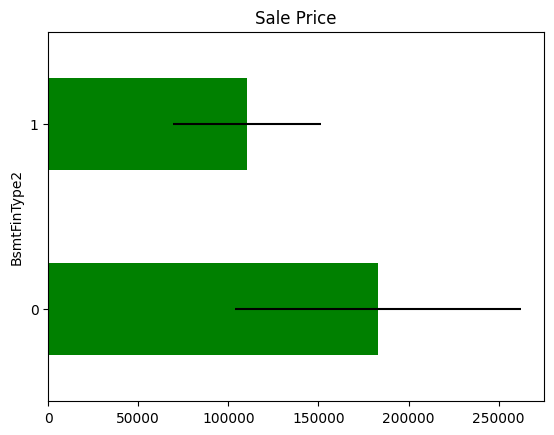

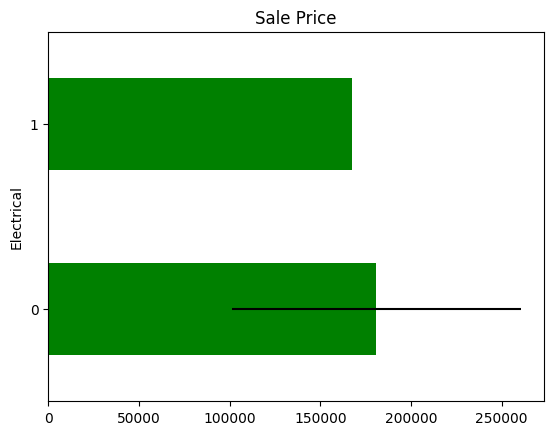

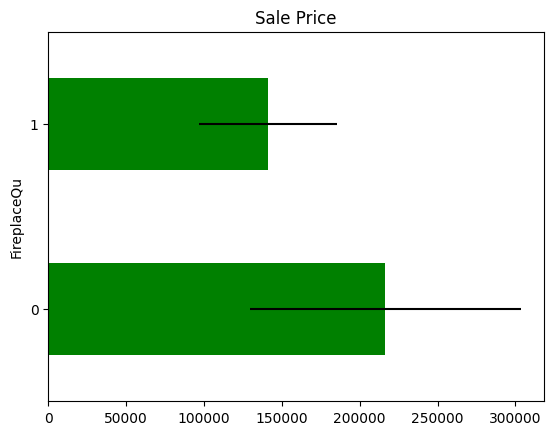

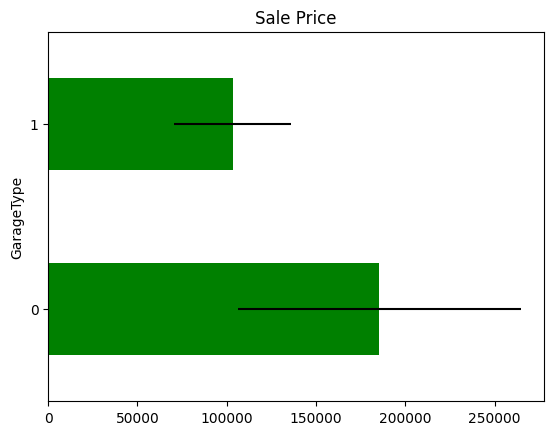

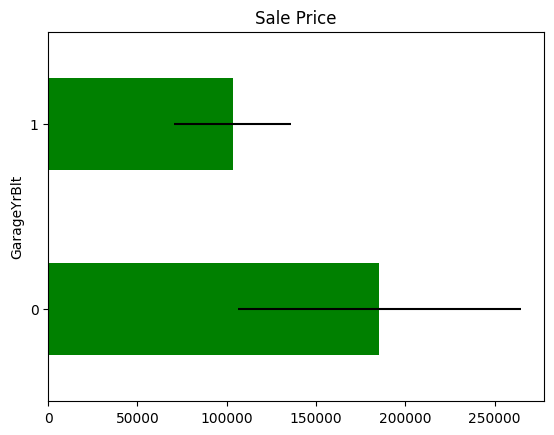

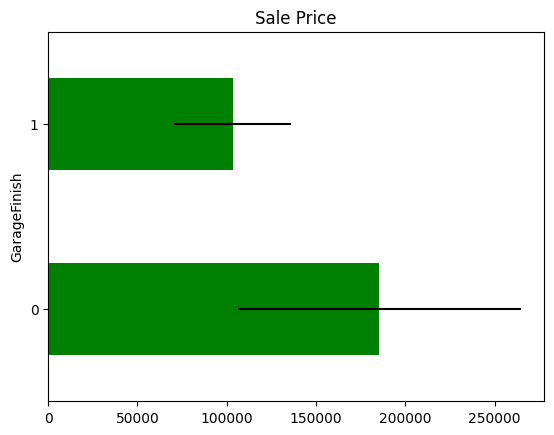

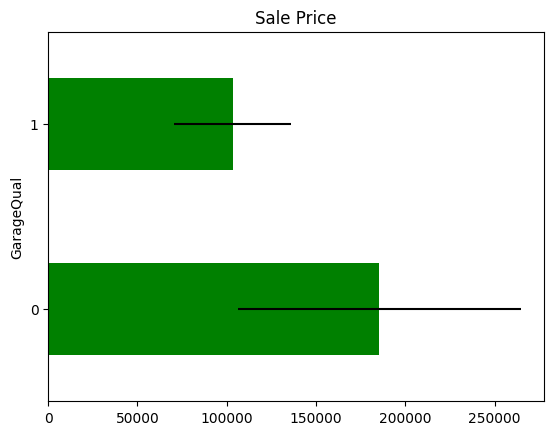

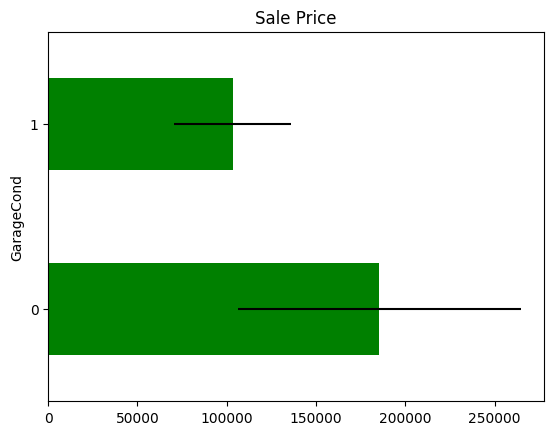

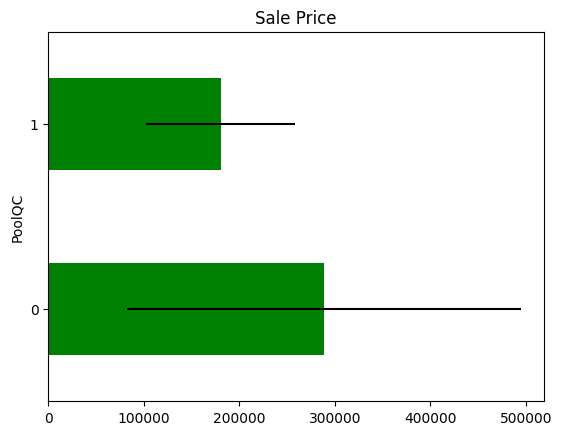

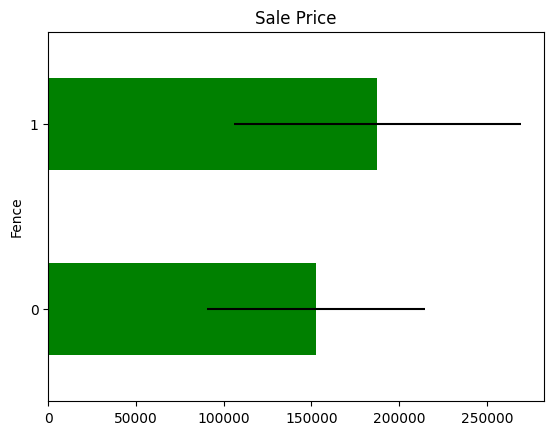

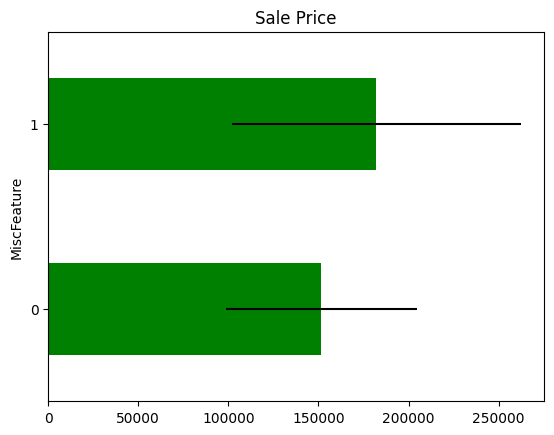

In [151]:
# check the above function on each variable with missing data
for var in vars_with_na:
    analyse_na_value(data, var)

In [152]:
print(num_vars)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [153]:
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
print(year_vars)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


Text(0, 0.5, 'Median House Price')

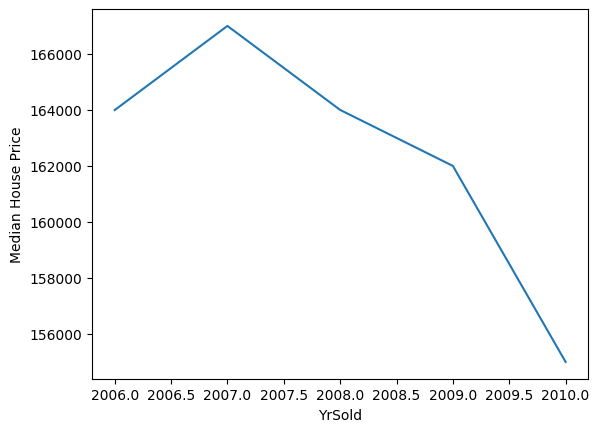

In [154]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

Text(0, 0.5, 'Median House Price')

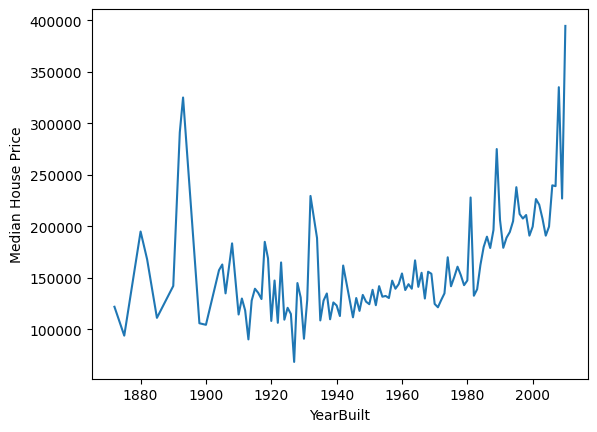

In [155]:
data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

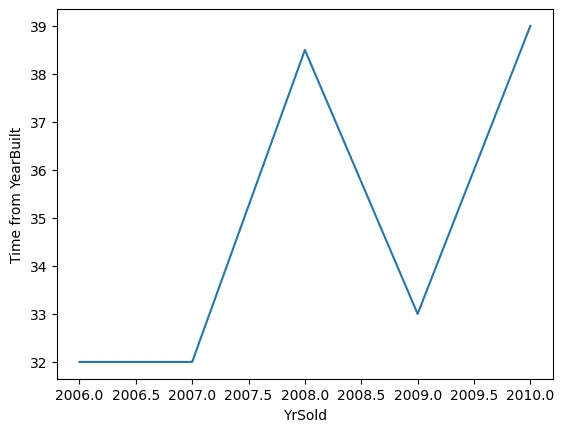

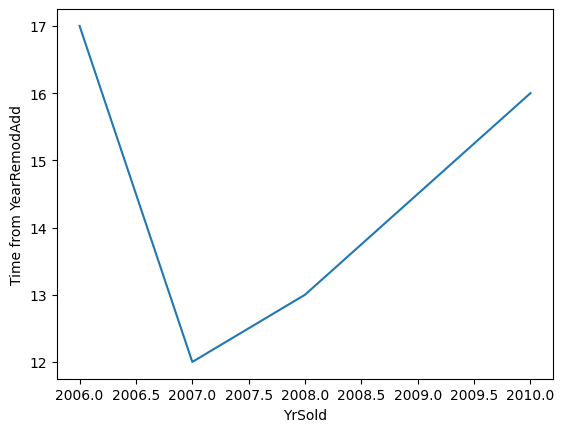

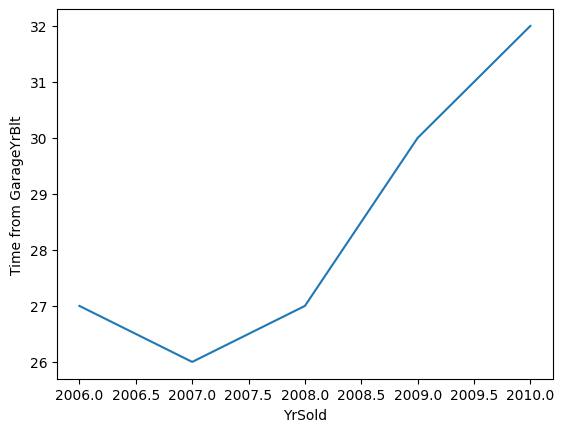

In [156]:
def analyse_year_vars(df, var):
    df = df.copy()

    df[var] = df['YrSold'] - df[var]
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()

for var in year_vars:
    if var != 'YrSold':
        analyse_year_vars(data, var)

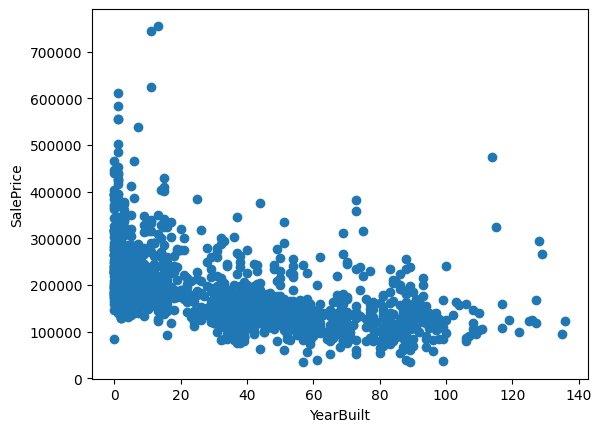

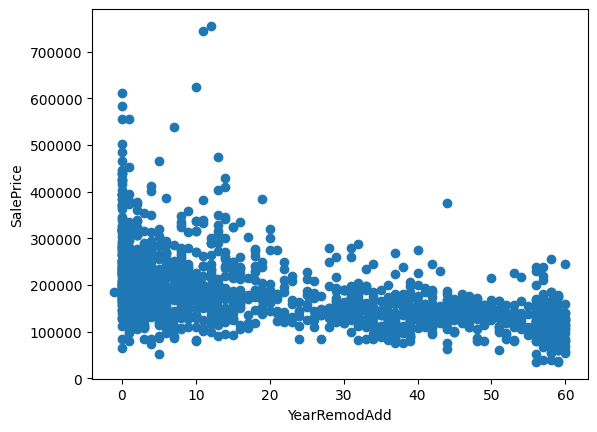

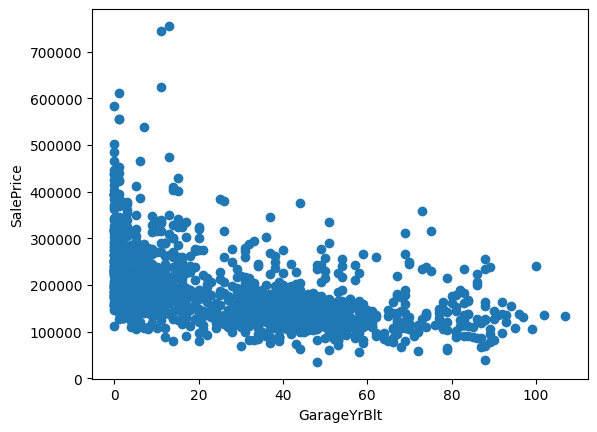

In [157]:
def analyse_year_vars(df, var):
    df = df.copy()

    df[var] = df['YrSold'] - df[var]
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()

for var in year_vars:
    if var != 'YrSold':
        analyse_year_vars(data, var)

In [158]:
discrete_vars = [var for var in num_vars if data[var].nunique() < 20 and var not in year_vars]
print(discrete_vars)

['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold']


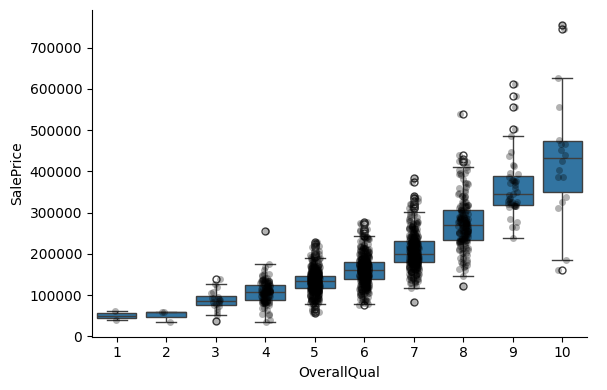

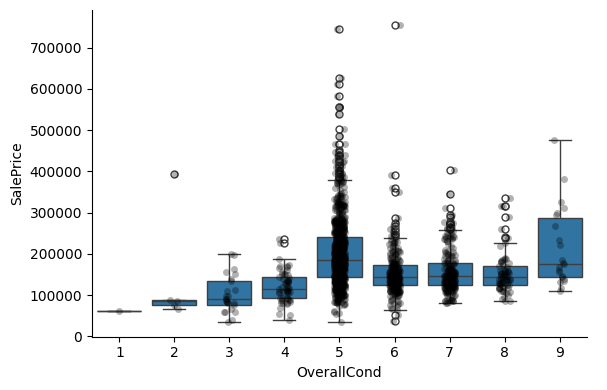

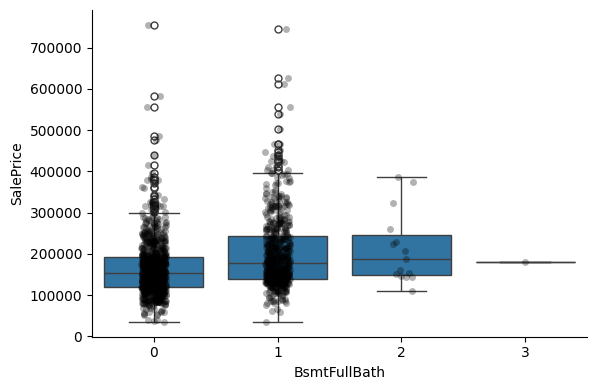

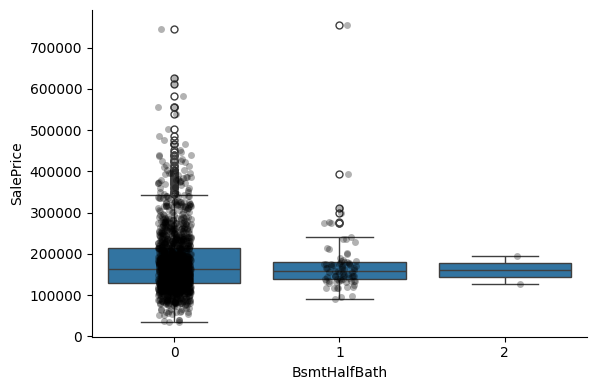

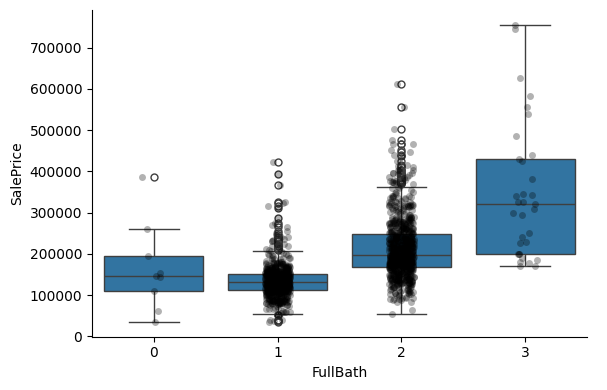

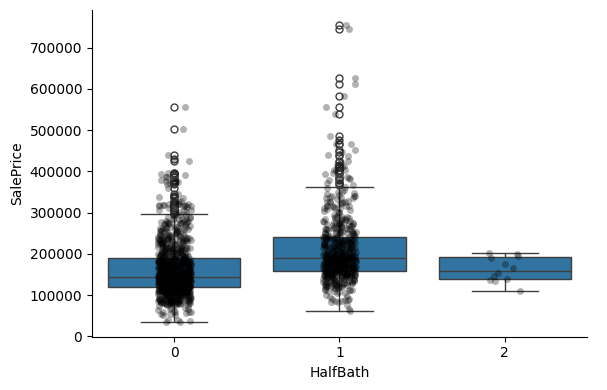

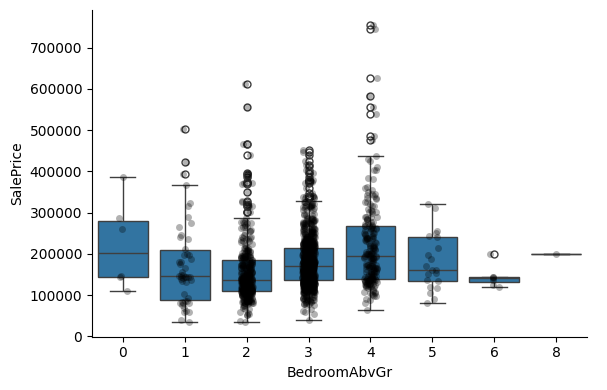

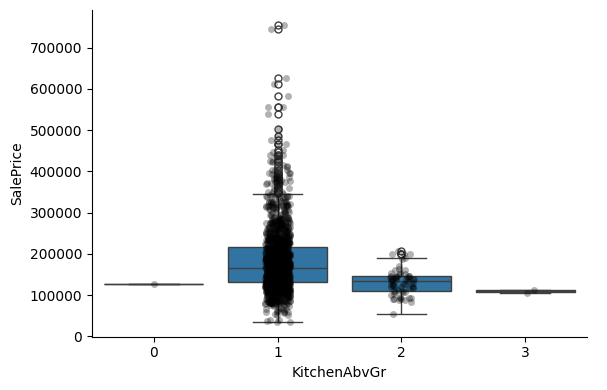

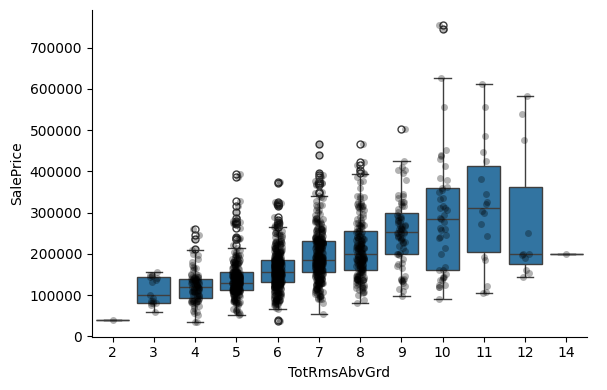

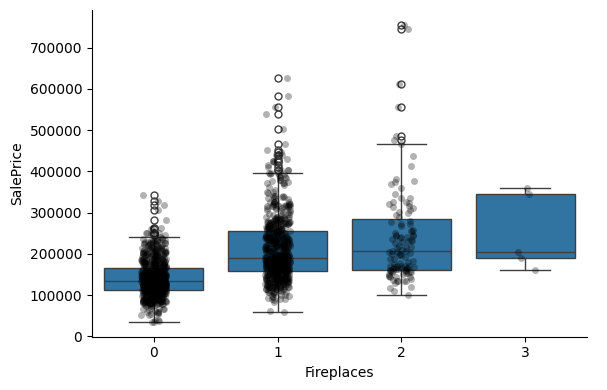

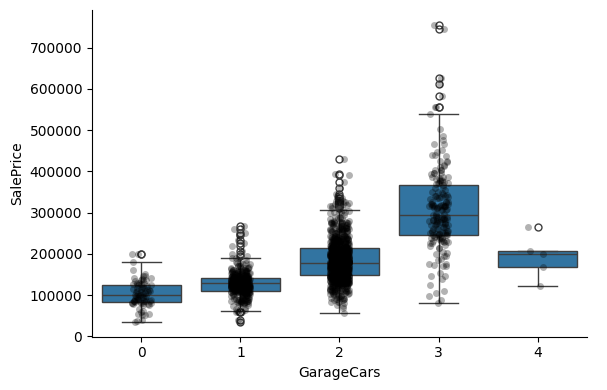

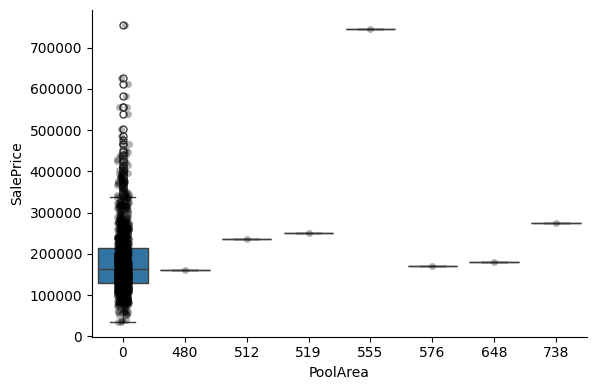

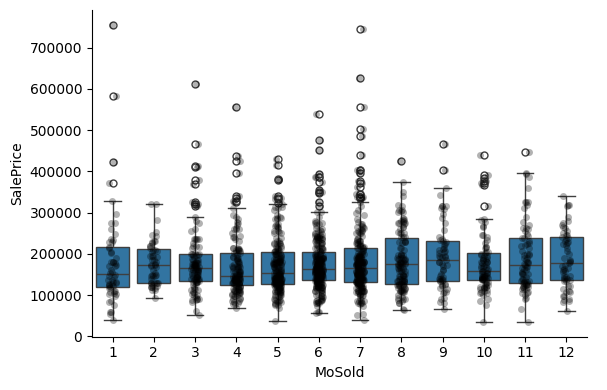

In [159]:
for var in discrete_vars:
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

In [160]:
cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars]
print(len(cont_vars))

18


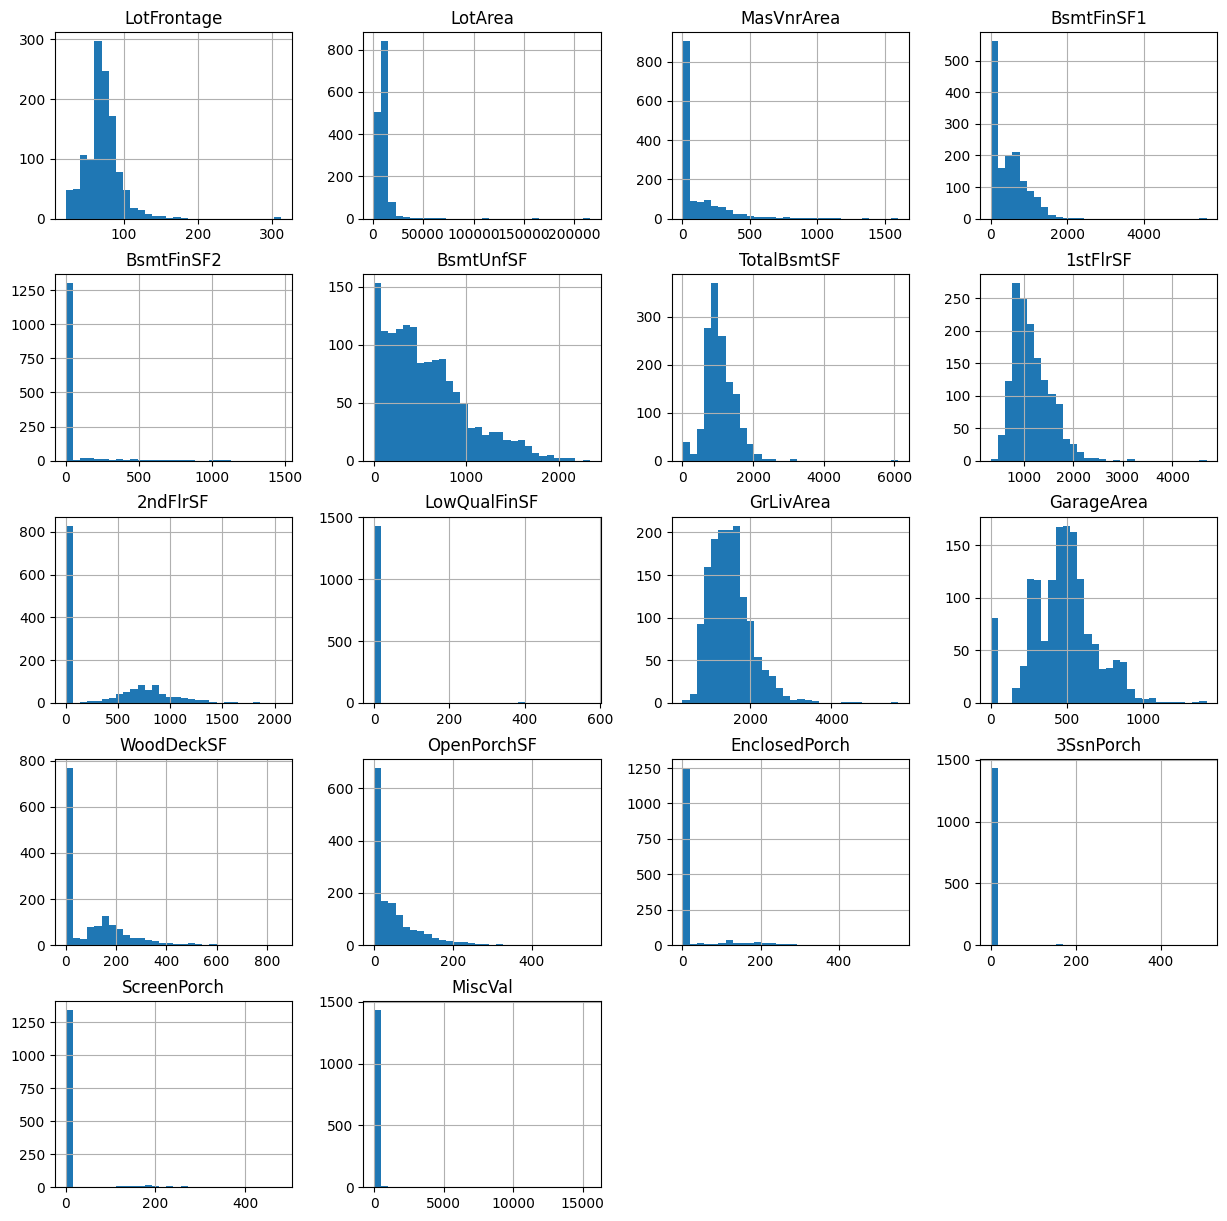

In [161]:
data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

In [162]:
# list of super skewed variables
skewed = ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch',
          'ScreenPorch', 'MiscVal']
cont_vars = list(set(cont_vars) - set(skewed))
print(len(skewed))
print(len(cont_vars))

6
12


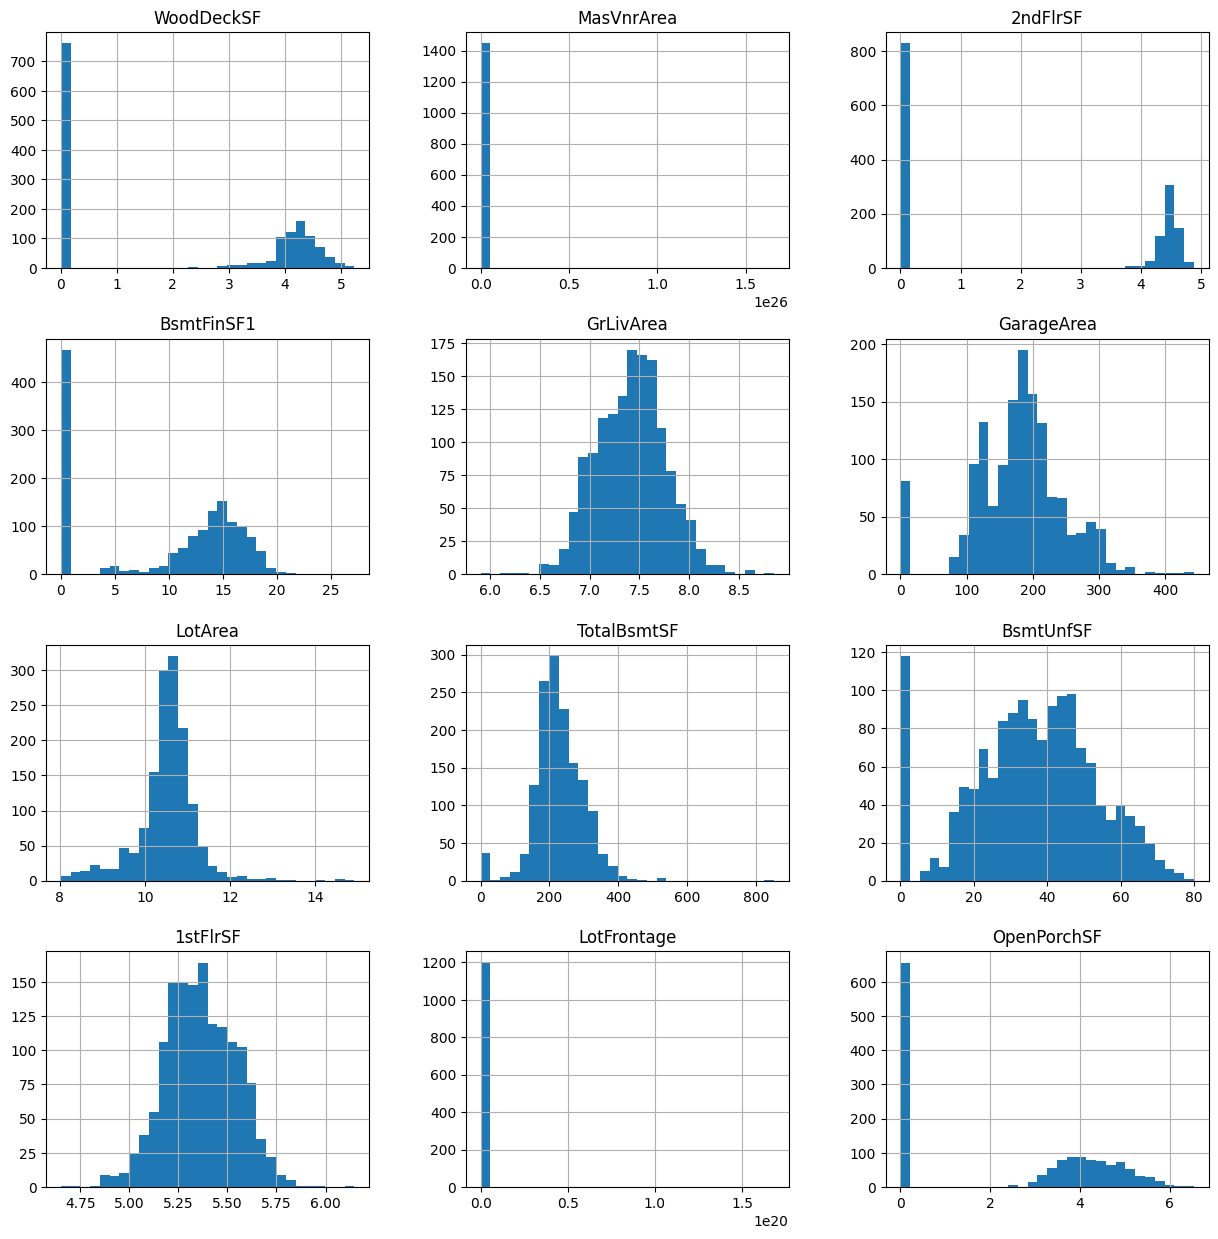

In [163]:
tmp = data.copy()

for var in cont_vars:
    tmp[var], param = stats.yeojohnson(data[var])

tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

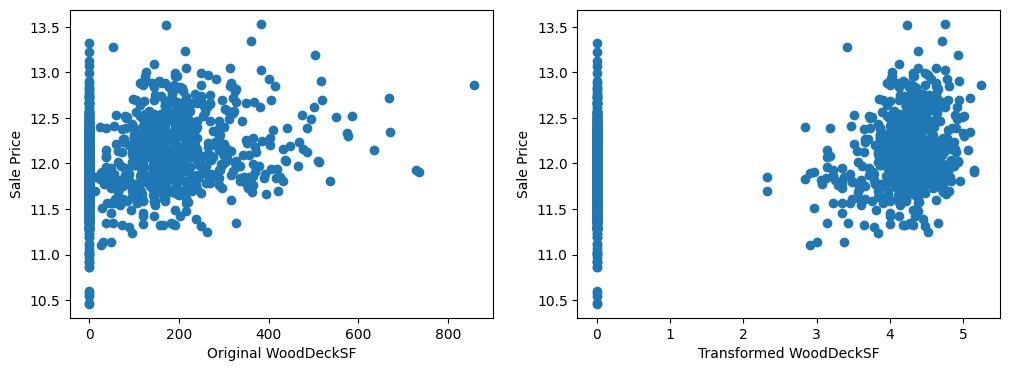

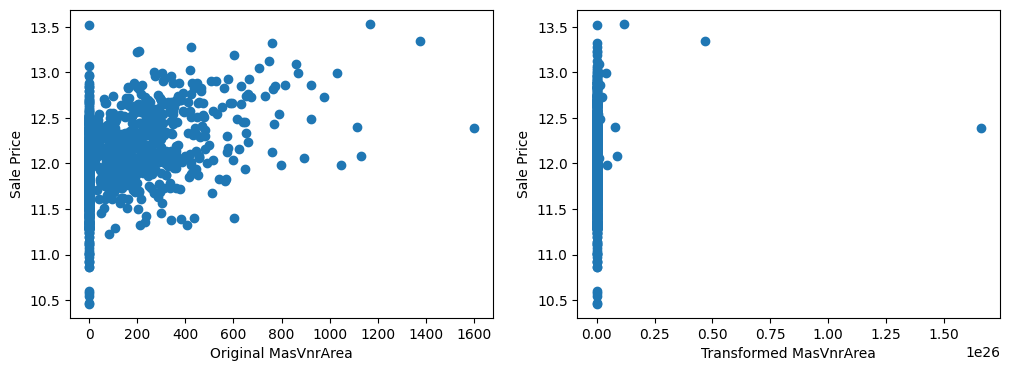

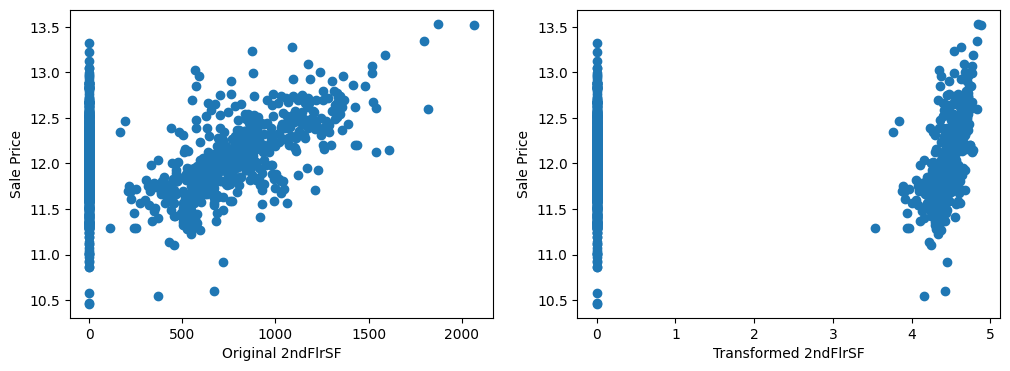

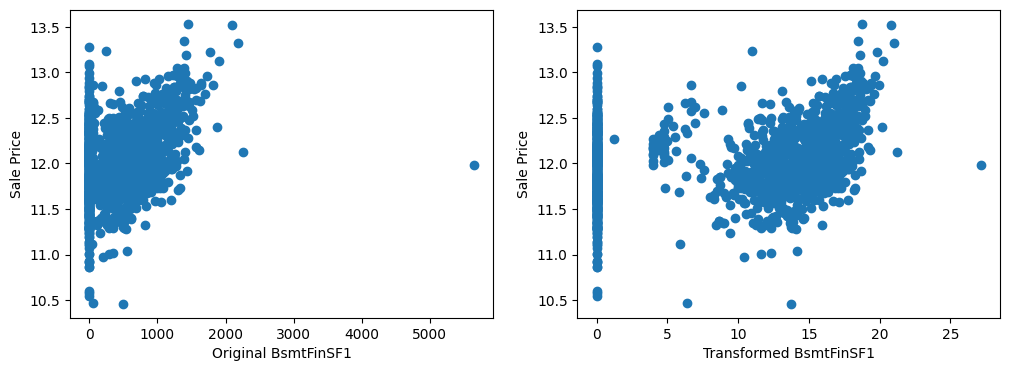

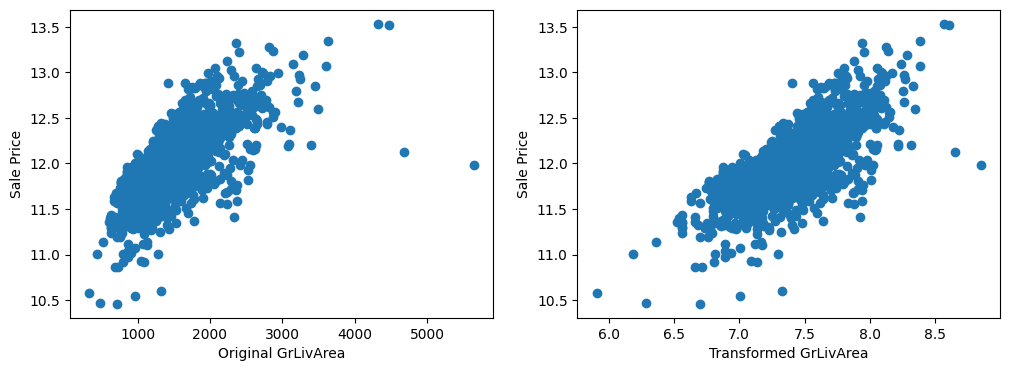

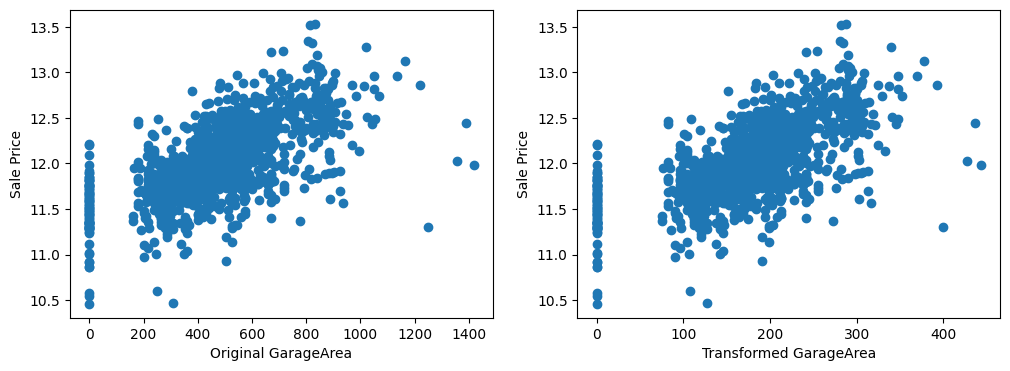

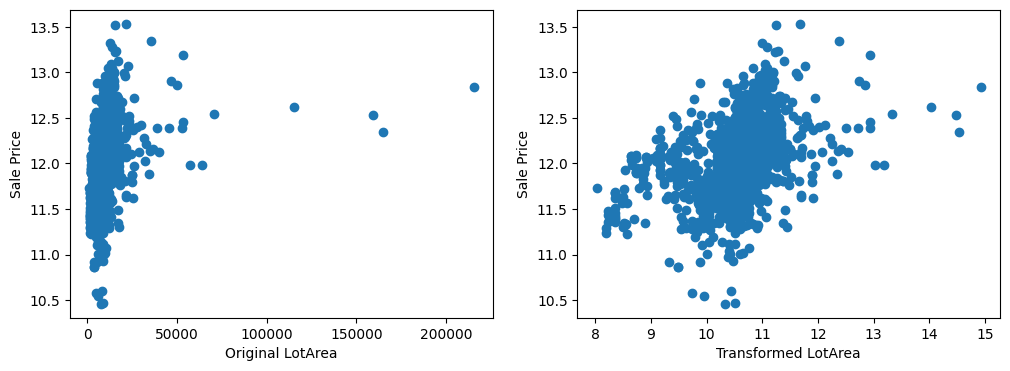

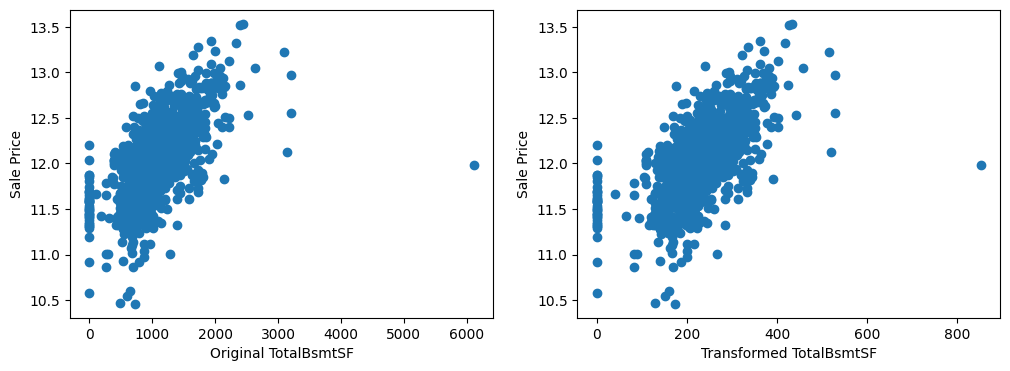

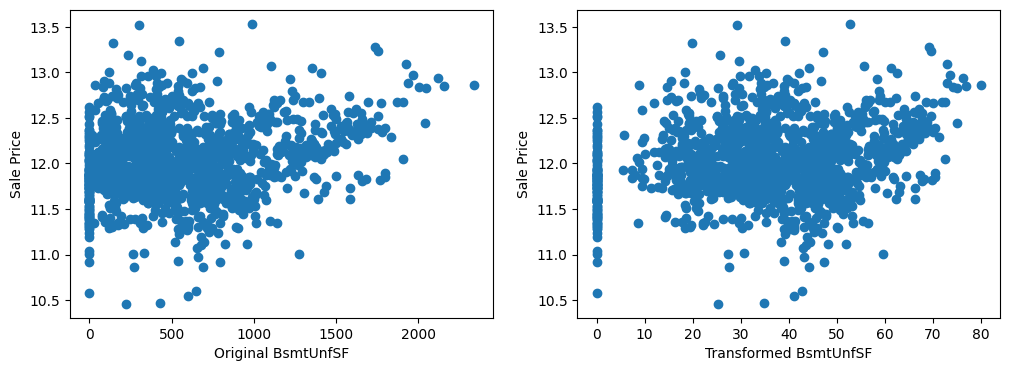

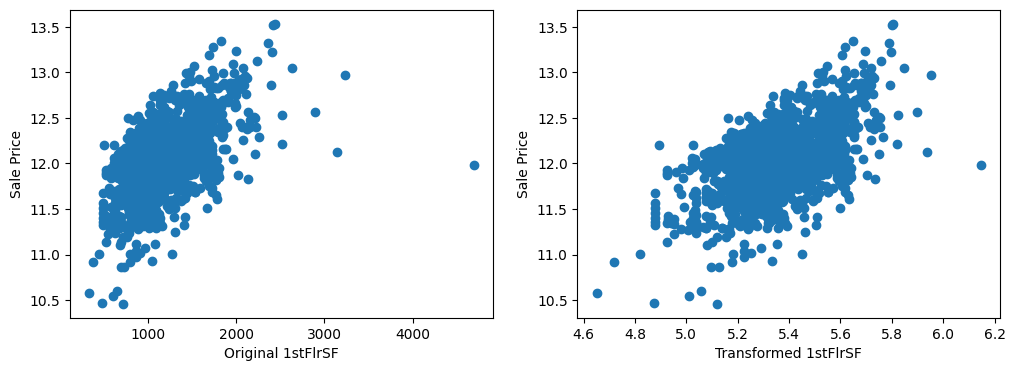

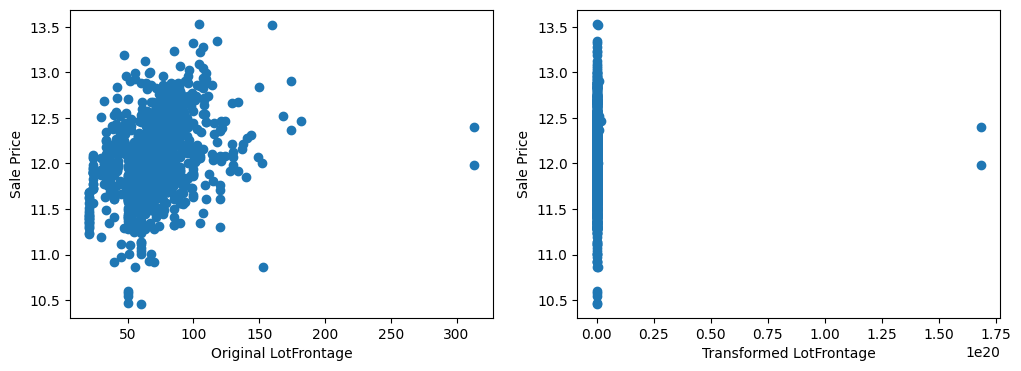

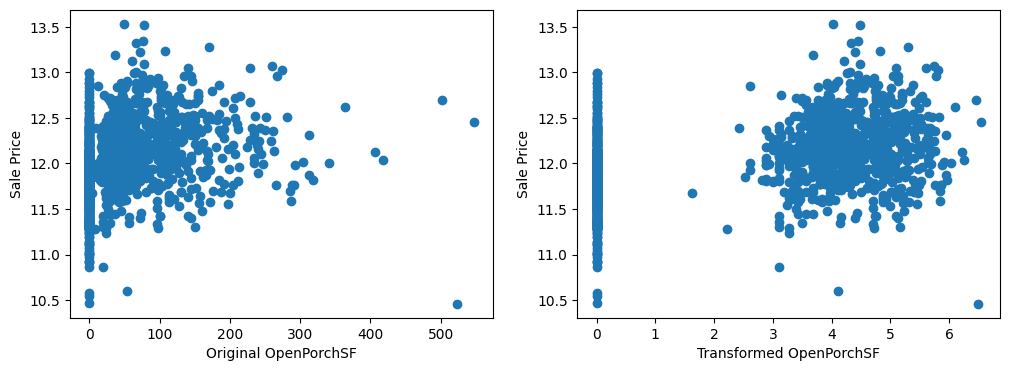

In [164]:
for var in cont_vars:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original '+ var)

    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed '+ var)

    plt.show()

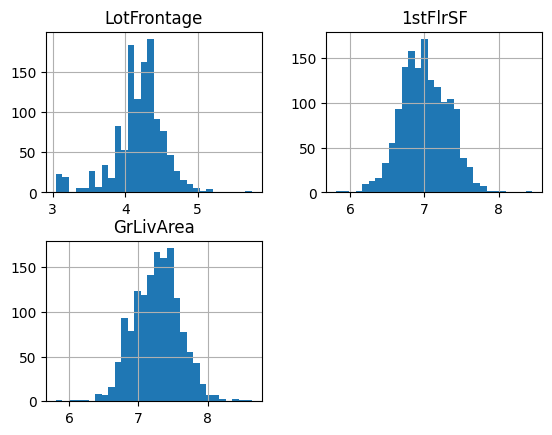

In [165]:
tmp = data.copy()

for var in ['LotFrontage', '1stFlrSF', 'GrLivArea']:
    tmp[var] = np.log(data[var])

tmp[['LotFrontage', '1stFlrSF', 'GrLivArea']].hist(bins=30)
plt.show()

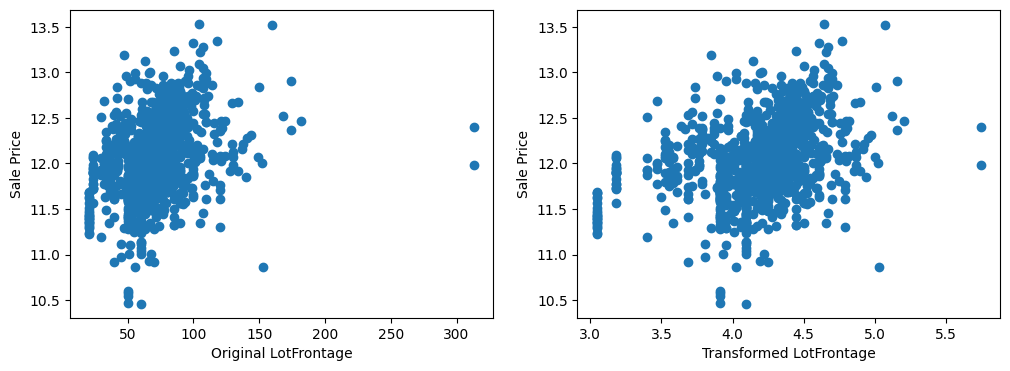

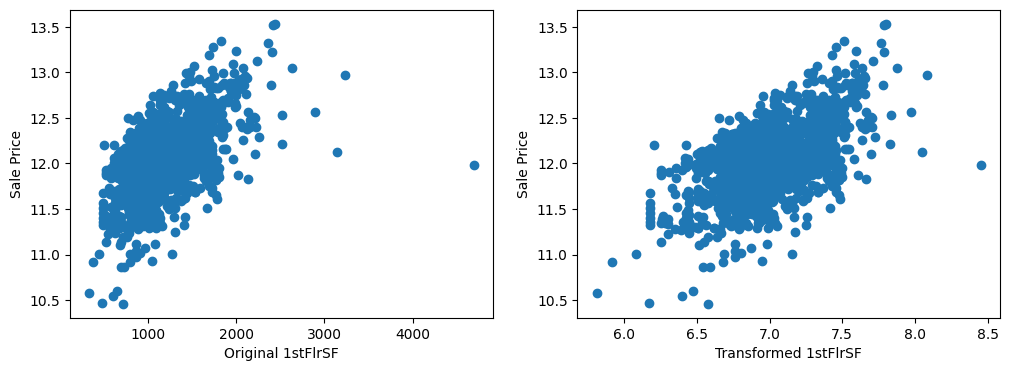

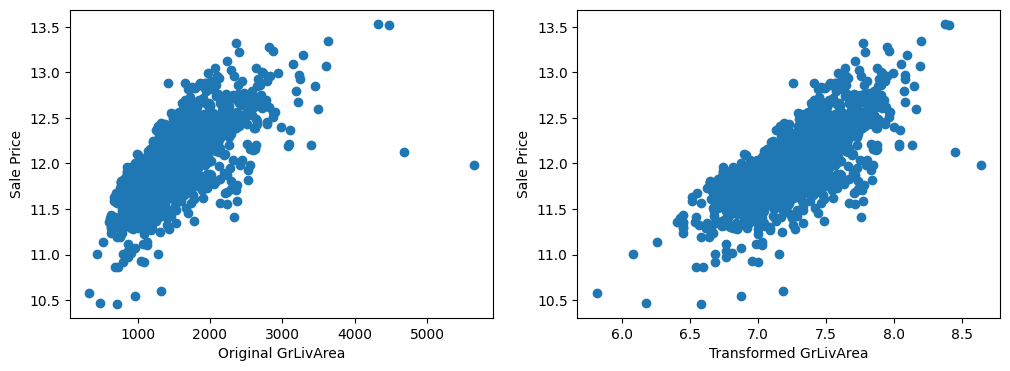

In [166]:
for var in ['LotFrontage', '1stFlrSF', 'GrLivArea']:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original '+ var)

    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed '+ var)

    plt.show()

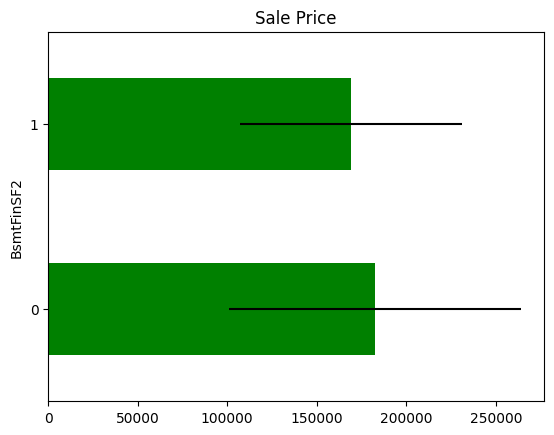

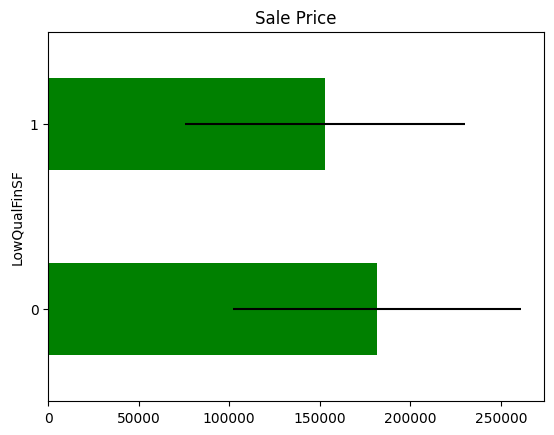

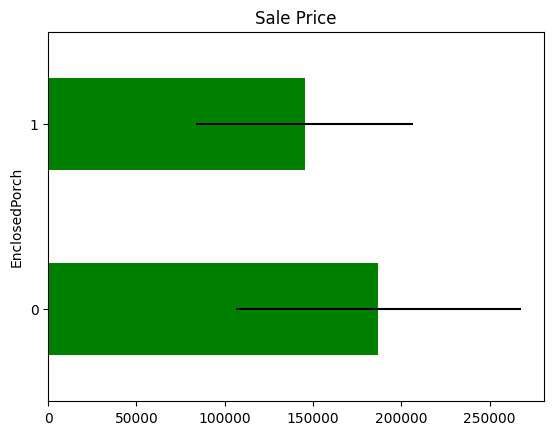

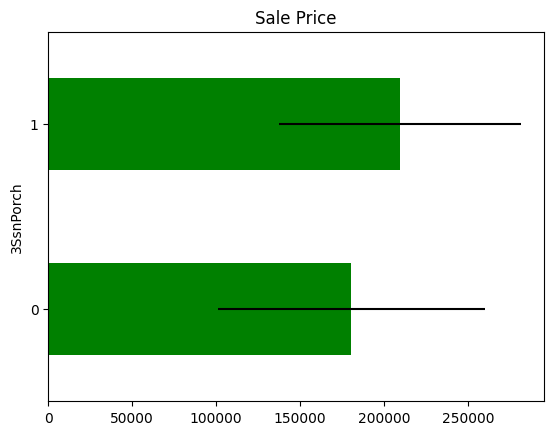

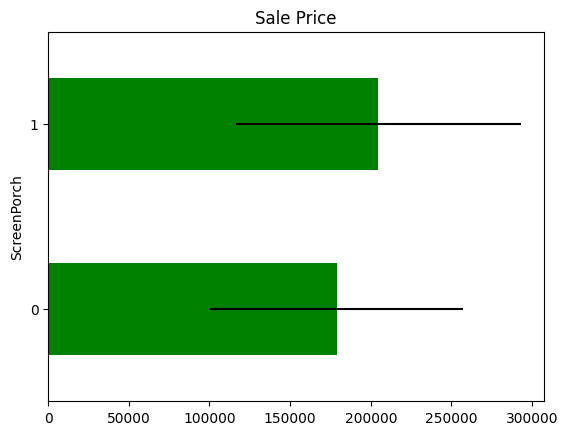

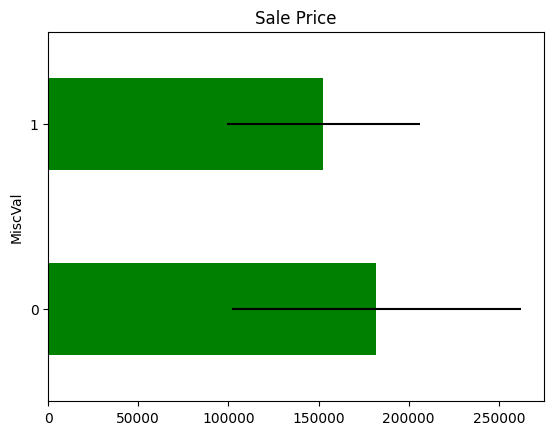

In [167]:
for var in skewed:
    tmp = data.copy()
    tmp[var] = np.where(data[var]==0, 0, 1)
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

    tmp.plot(kind='barh', y='mean', legend=False, xerr='std',
             title='Sale Price', color='green')
    plt.show()

<Axes: >

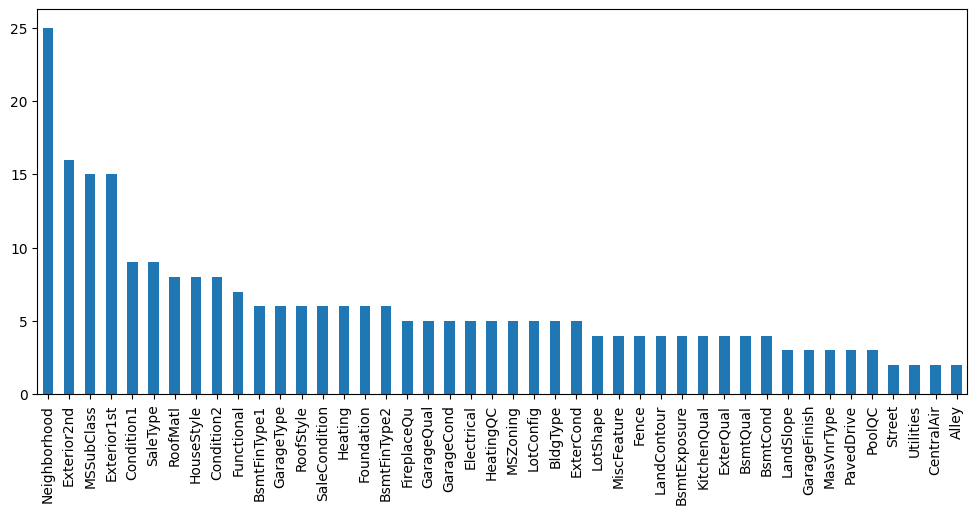

In [168]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [169]:
qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0,
                 'NA': 0}
qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
             'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

for var in qual_vars:
    data[var] = data[var].map(qual_mappings)

In [170]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}
var = 'BsmtExposure'
data[var] = data[var].map(exposure_mappings)

In [171]:
fisish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 2,
                   'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
finish_vars = ['BsmtFinType1', 'BsmtFinType2']
for var in finish_vars:
    data[var] = data[var].map(fisish_mappings)

In [172]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
var = 'GarageFinish'
data[var] = data[var].map(garage_mappings)

In [173]:
data['GarageFinish'].value_counts()

GarageFinish
1.0    605
2.0    422
3.0    352
Name: count, dtype: int64

In [174]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3,
                  'GdPrv': 4}
var = 'Fence'
data[var] = data[var].map(fence_mappings)

In [175]:
qual_vars = qual_vars + finish_vars + ['BsmtExposure', 'GarageFinish', 'Fence']

In [176]:
qual_vars

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtExposure',
 'GarageFinish',
 'Fence']

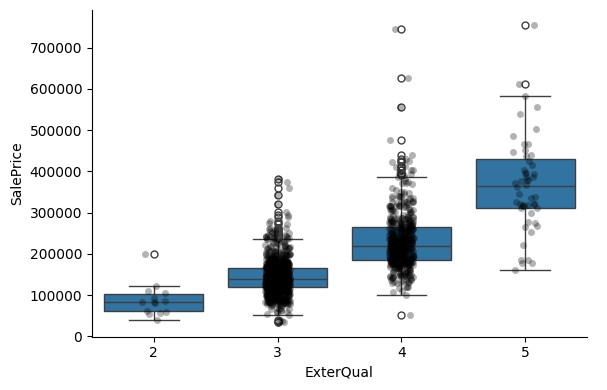

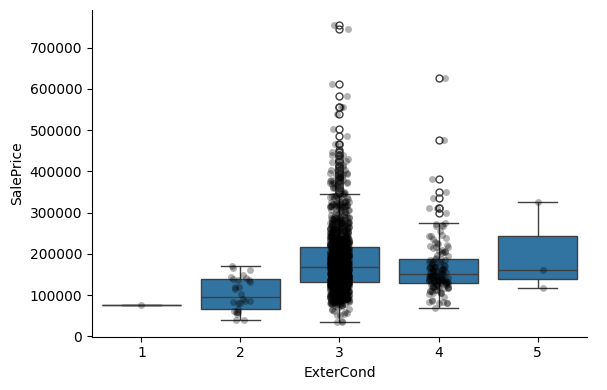

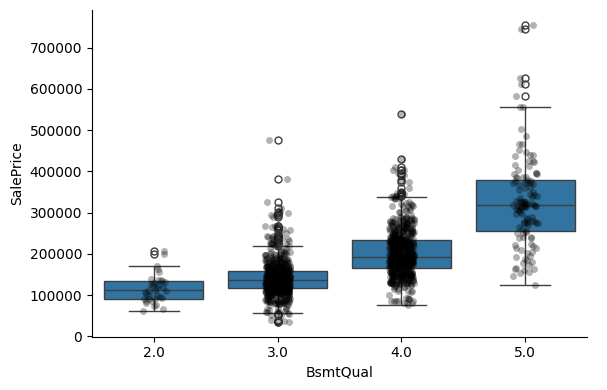

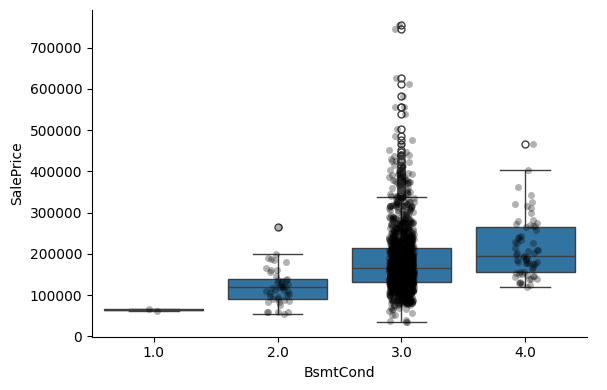

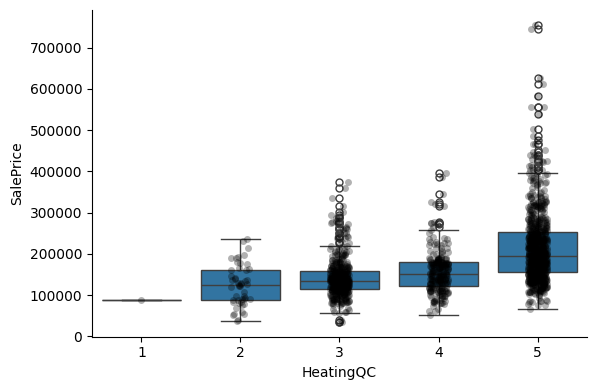

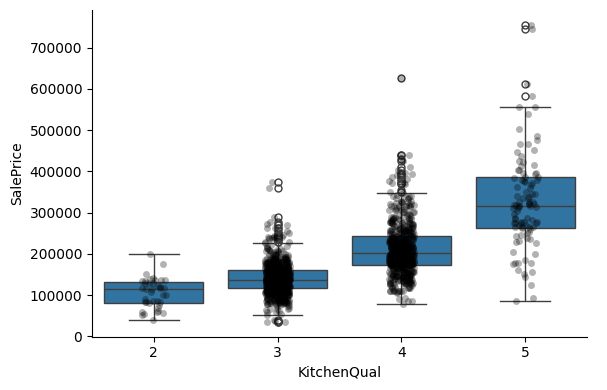

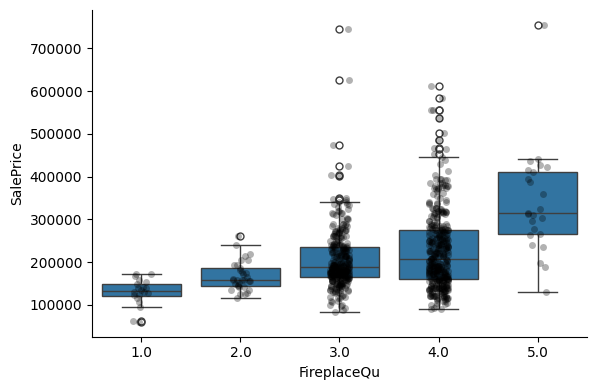

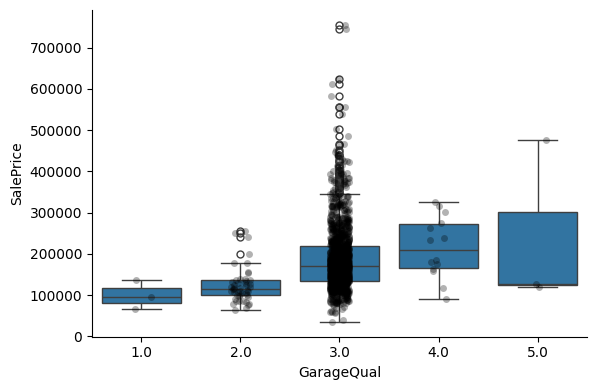

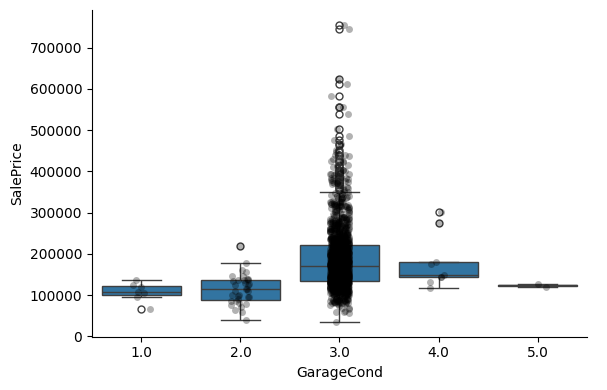

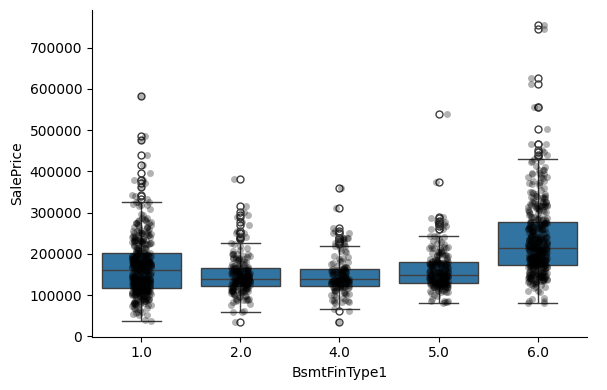

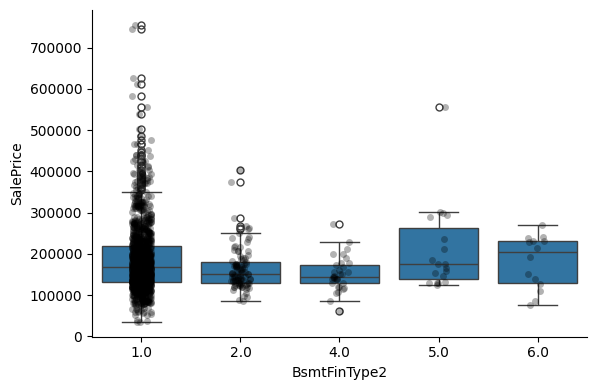

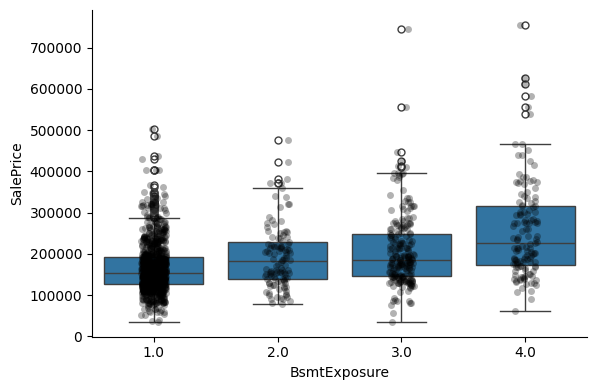

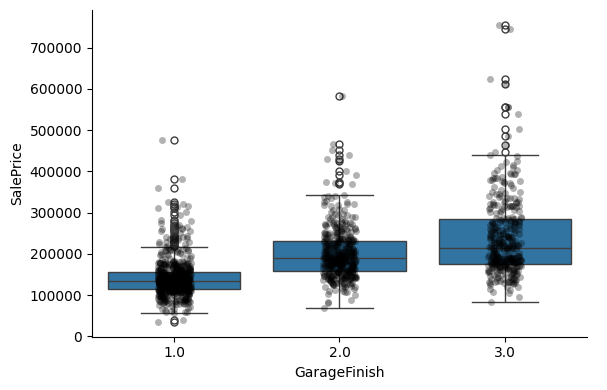

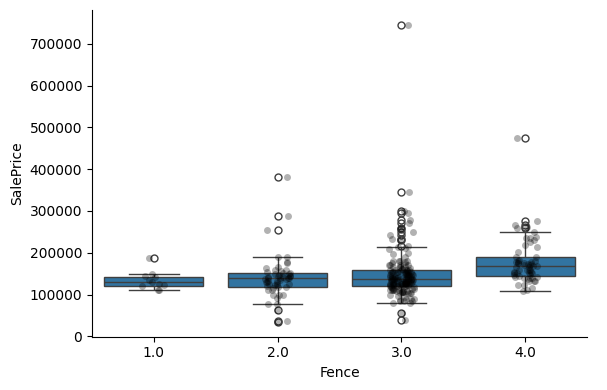

In [177]:
for var in qual_vars:
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()